In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
from bs4 import BeautifulSoup

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use('dark_background')
pd.set_option('display.max_columns', None)

### Loading data

In [2]:
train_df = pd.read_csv('train.csv', index_col='id')
test_df = pd.read_csv('test.csv', index_col='id')
sample_submission_df = pd.read_csv('sample_submission.csv', index_col='id')
abalone_dataset_df = pd.read_csv('abalone.data', header=None) # original abalone dataset

In [3]:
# Getting variables table from the site of original dataset
url = 'https://archive.ics.uci.edu/dataset/1/abalone'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')
rows = table.find_all('tr')
columns, data = [], []
for th in rows[0].find_all('th'):
    columns.append(th.text.strip())
    
for row in rows[1:]:
    data_row = []
    for td in row.find_all('td'):
        data_row.append(td.text.strip())
    data.append(data_row)
    
variables_table = pd.DataFrame(data, columns=columns)
variables_table

,Variable Name,Role,Type,Description,Units,Missing Values
0,Sex,Feature,Categorical,"M, F, and I (infant)",,no
1,Length,Feature,Continuous,Longest shell measurement,mm,no
2,Diameter,Feature,Continuous,perpendicular to length,mm,no
3,Height,Feature,Continuous,with meat in shell,mm,no
4,Whole_weight,Feature,Continuous,whole abalone,grams,no
5,Shucked_weight,Feature,Continuous,weight of meat,grams,no
6,Viscera_weight,Feature,Continuous,gut weight (after bleeding),grams,no
7,Shell_weight,Feature,Continuous,after being dried,grams,no
8,Rings,Target,Integer,+1.5 gives the age in years,,no


In [4]:
train_df.rename(columns={'Whole weight': 'Whole_weight',
                         'Whole weight.1': 'Shucked_weight',
                         'Whole weight.2': 'Viscera_weight',
                         'Shell weight': 'Shell_weight'}, inplace=True)
abalone_dataset_df.columns = train_df.columns.to_list()
feature_cols = train_df.iloc[:, :-1].columns.to_list()
test_df.columns = feature_cols
target_column = 'Rings'

**Additional information**:

Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.  Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

In [5]:
abalone_dataset_df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
train_df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [7]:
test_df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [8]:
sample_submission_df.head()

,Rings
id,
90615,10
90616,10
90617,10
90618,10
90619,10


### Comparing original and synthetic data

In [9]:
train_df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
abalone_dataset_df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Synthetic data (train_df) generated with exactly the same ranges as original dataset

In [11]:
# Comparing skewness and kurtosis
for col in train_df.columns[1:]:
    print(f'Column: {col:}')
    print(f'Synth skewness: {train_df[col].skew():.4} | Original skewness: {abalone_dataset_df[col].skew():.4}')
    print(f'Synth kurtosis: {train_df[col].kurt():.4} | Original kurtosis: {abalone_dataset_df[col].skew():.4}')
    print('-'*40)

Column: Length
Synth skewness: -0.732 | Original skewness: -0.6399
Synth kurtosis: 0.1334 | Original kurtosis: -0.6399
----------------------------------------
Column: Diameter
Synth skewness: -0.6952 | Original skewness: -0.6092
Synth kurtosis: 0.0006463 | Original kurtosis: -0.6092
----------------------------------------
Column: Height
Synth skewness: 0.31 | Original skewness: 3.129
Synth kurtosis: 13.45 | Original kurtosis: 3.129
----------------------------------------
Column: Whole_weight
Synth skewness: 0.4293 | Original skewness: 0.531
Synth kurtosis: -0.1851 | Original kurtosis: 0.531
----------------------------------------
Column: Shucked_weight
Synth skewness: 0.592 | Original skewness: 0.7191
Synth kurtosis: 0.284 | Original kurtosis: 0.7191
----------------------------------------
Column: Viscera_weight
Synth skewness: 0.4767 | Original skewness: 0.5919
Synth kurtosis: -0.2037 | Original kurtosis: 0.5919
----------------------------------------
Column: Shell_weight
Synth 

`Height` column might have slightly different distribution across these two datasets

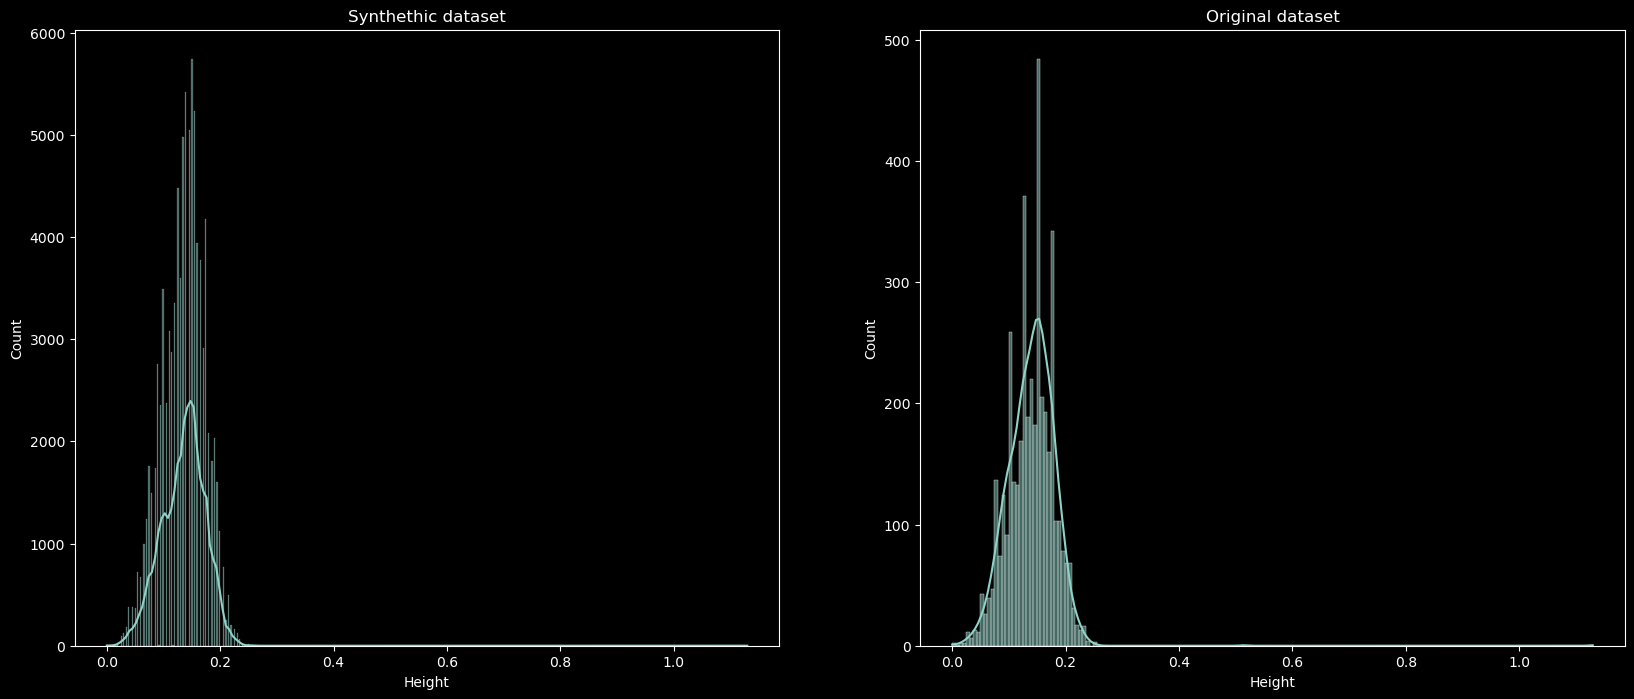

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
sns.histplot(train_df['Height'], kde=True, ax=axs[0])
axs[0].set_title('Synthethic dataset')
sns.histplot(abalone_dataset_df['Height'], kde=True, ax=axs[1])
axs[1].set_title('Original dataset')
plt.show()

Difference is in number of samples

In [13]:
# potential outliers in synthethic dataset
for col in feature_cols[1:]:
    iqr = (train_df[col].quantile(q=0.25), train_df[col].quantile(q=0.75))
    bounds = (iqr[0] - 1.5*(iqr[1] - iqr[0]), iqr[1] + 1.5*(iqr[1] - iqr[0]))
    outside_count = train_df[(train_df[col] < bounds[0]) | (train_df[col] > bounds[1])].shape[0]
    print(f'Column: {col} | Outliers: {outside_count*100/train_df[col].shape[0]:.2f}%')

Column: Length | Outliers: 1.61%
Column: Diameter | Outliers: 1.74%
Column: Height | Outliers: 0.38%
Column: Whole_weight | Outliers: 0.63%
Column: Shucked_weight | Outliers: 1.07%
Column: Viscera_weight | Outliers: 0.49%
Column: Shell_weight | Outliers: 0.74%


In [14]:
# potential outliers in original dataset
for col in feature_cols[1:]:
    iqr = (abalone_dataset_df[col].quantile(q=0.25), abalone_dataset_df[col].quantile(q=0.75))
    bounds = (iqr[0] - 1.5*(iqr[1] - iqr[0]), iqr[1] + 1.5*(iqr[1] - iqr[0]))
    outside_count = abalone_dataset_df[(abalone_dataset_df[col] < bounds[0]) | (abalone_dataset_df[col] > bounds[1])].shape[0]
    print(f'Column: {col} | Outliers: {outside_count*100/abalone_dataset_df[col].shape[0]:.2f}%')

Column: Length | Outliers: 1.17%
Column: Diameter | Outliers: 1.41%
Column: Height | Outliers: 0.69%
Column: Whole_weight | Outliers: 0.72%
Column: Shucked_weight | Outliers: 1.15%
Column: Viscera_weight | Outliers: 0.62%
Column: Shell_weight | Outliers: 0.84%


In [15]:
from sklearn.feature_selection import mutual_info_regression

def make_mi(df):
    X = df.copy()
    y = X.pop(target_column)
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [16]:
# Mutual information for synthetic dataset (OH encoded 'sex' column)
make_mi(pd.get_dummies(train_df, columns=['Sex'], dtype=int))

Shell_weight      0.680944
Whole_weight      0.575101
Height            0.549640
Diameter          0.544526
Viscera_weight    0.543883
Length            0.531574
Shucked_weight    0.510953
Sex_I             0.240567
Sex_F             0.076541
Sex_M             0.059447
Name: MI Scores, dtype: float64

In [17]:
# Mutual information for original dataset
make_mi(pd.get_dummies(abalone_dataset_df, columns=['Sex'], dtype=int))

Shell_weight      0.478597
Diameter          0.407073
Height            0.393231
Whole_weight      0.392112
Viscera_weight    0.374862
Length            0.373972
Shucked_weight    0.330858
Sex_I             0.139087
Sex_F             0.049041
Sex_M             0.028366
Name: MI Scores, dtype: float64

In [18]:
# Checking if there are duplicates
pd.concat([train_df, abalone_dataset_df], axis=0).duplicated().any()

False

Adding original data to the training set might be valuable, since they do not differ as much

### Saving data

In [19]:
DATA_DIRECTORY = 'data'

if not os.path.exists(DATA_DIRECTORY):
    os.makedirs(DATA_DIRECTORY)

train_df.to_csv(os.path.join(DATA_DIRECTORY, 'train_df.csv'), index=False)
abalone_dataset_df.to_csv(os.path.join(DATA_DIRECTORY, 'original_df.csv'), index=False)
test_df.to_csv(os.path.join(DATA_DIRECTORY, 'test_df.csv'), index=False)
variables_table.to_csv(os.path.join(DATA_DIRECTORY, 'variables_table.csv'), index=False)